## Importing libraries

In [75]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

sns.set_style("whitegrid")

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split,  cross_val_score, GridSearchCV

from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Importing dataset

In [76]:
# reading dataset

df = pd.read_csv('../bike_sharing/bike.csv', parse_dates=True)
df.head()

,Date,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users
0,1/1/2011,4,0,0,6,0,1,36.6,37.4,81,0,3,13,16
1,1/1/2011,4,1,0,6,0,1,34.9,35.6,80,0,8,32,40
2,1/1/2011,4,2,0,6,0,1,34.9,35.6,80,0,5,27,32
3,1/1/2011,4,3,0,6,0,1,36.6,37.4,75,0,3,10,13
4,1/1/2011,4,4,0,6,0,1,36.6,37.4,75,0,0,1,1


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
Date                   17379 non-null object
Season                 17379 non-null int64
Hour                   17379 non-null int64
Holiday                17379 non-null int64
Day of the Week        17379 non-null int64
Working Day            17379 non-null int64
Weather Type           17379 non-null int64
Temperature F          17379 non-null float64
Temperature Feels F    17379 non-null float64
Humidity               17379 non-null int64
Wind Speed             17379 non-null int64
Casual Users           17379 non-null int64
Registered Users       17379 non-null int64
Total Users            17379 non-null int64
dtypes: float64(2), int64(11), object(1)
memory usage: 1.9+ MB


In [82]:
df.describe()

,Season,Hour,Holiday,Day of the Week,Working Day,Weather Type,Temperature F,Temperature Feels F,Humidity,Wind Speed,Casual Users,Registered Users,Total Users
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.485241,11.546752,0.028770,3.003683,0.682721,1.425283,58.777507,59.722009,62.722884,12.736233,35.676218,153.786869,189.463088
std,1.115985,6.914405,0.167165,2.005771,0.465431,0.639357,16.620757,20.415345,19.292983,8.196891,49.305030,151.357286,181.387599
min,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,17.600000,3.200000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,6.000000,0.000000,1.000000,0.000000,1.000000,45.200000,42.800000,48.000000,7.000000,4.000000,34.000000,40.000000
50%,2.000000,12.000000,0.000000,3.000000,1.000000,1.000000,59.000000,60.800000,63.000000,13.000000,17.000000,115.000000,142.000000
75%,3.000000,18.000000,0.000000,5.000000,1.000000,2.000000,72.800000,77.000000,78.000000,17.000000,48.000000,220.000000,281.000000
max,4.000000,23.000000,1.000000,6.000000,1.000000,4.000000,102.200000,122.000000,100.000000,57.000000,367.000000,886.000000,977.000000


## Data Cleaning

In [83]:
# changing column names

df.columns = ['date', 'season', 'hr', 'holiday', 'day_of_week', 
              'working_day', 'weather_type', 'temp', 'temp_feels', 
              'humidity', 'wind_speed', 'casual_users', 'reg_users', 'total']
df.head()

,date,season,hr,holiday,day_of_week,working_day,weather_type,temp,temp_feels,humidity,wind_speed,casual_users,reg_users,total
0,1/1/2011,4,0,0,6,0,1,36.6,37.4,81,0,3,13,16
1,1/1/2011,4,1,0,6,0,1,34.9,35.6,80,0,8,32,40
2,1/1/2011,4,2,0,6,0,1,34.9,35.6,80,0,5,27,32
3,1/1/2011,4,3,0,6,0,1,36.6,37.4,75,0,3,10,13
4,1/1/2011,4,4,0,6,0,1,36.6,37.4,75,0,0,1,1


In [84]:
df = df.drop(['temp', 'casual_users', 'reg_users'], axis=1)

In [85]:
# extracting day, month, year

df['date'] = pd.to_datetime(df['date'])

df['day'] = pd.DatetimeIndex(df['date']).day
df['month'] = pd.DatetimeIndex(df['date']).month
df['year'] = pd.DatetimeIndex(df['date']).year

In [86]:
# missing values

df.isna().sum()

date            0
season          0
hr              0
holiday         0
day_of_week     0
working_day     0
weather_type    0
temp_feels      0
humidity        0
wind_speed      0
total           0
day             0
month           0
year            0
dtype: int64

In [88]:
df['year']=df['year']-2011

## Visual EDA

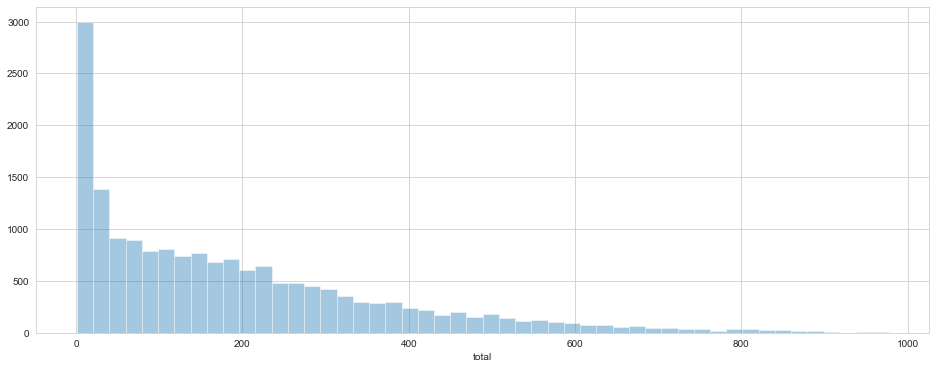

In [90]:
# target column distribution

plt.figure(figsize=(16,6))
sns.distplot(df['total'], kde=False)

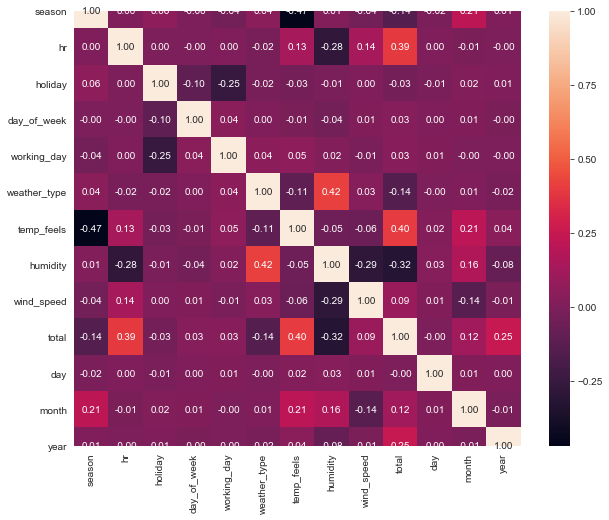

In [91]:
# heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

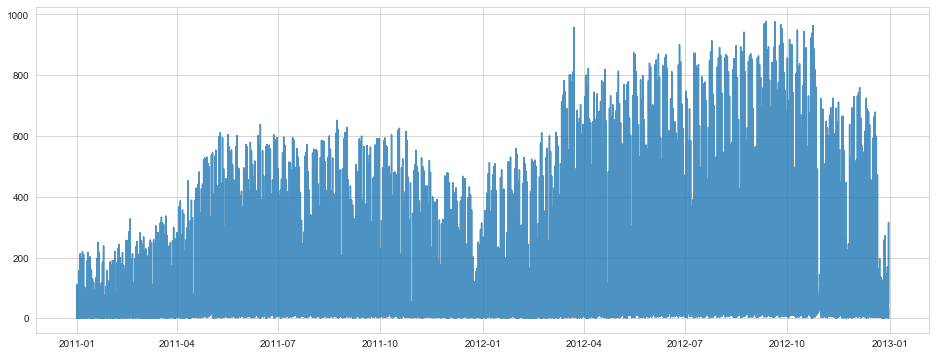

In [92]:
# date vs count plot

plt.figure(figsize=(16,6))
plt.plot(df['date'], df['total'], alpha=0.8)

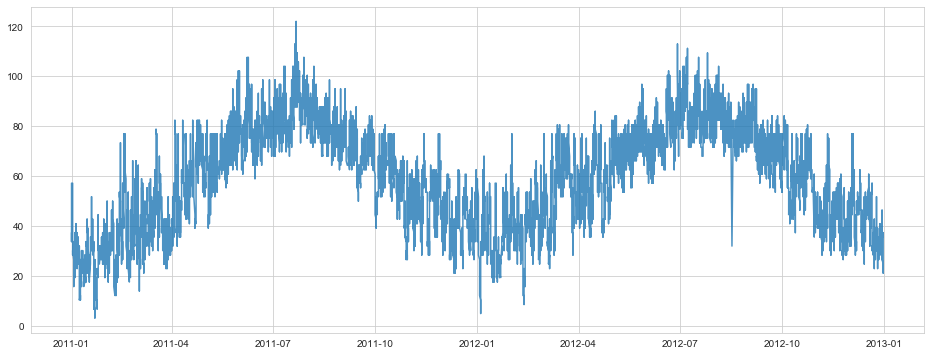

In [95]:
# date vs temp plot

plt.figure(figsize=(16,6))
plt.plot(df['date'], df['temp_feels'], alpha=0.8)

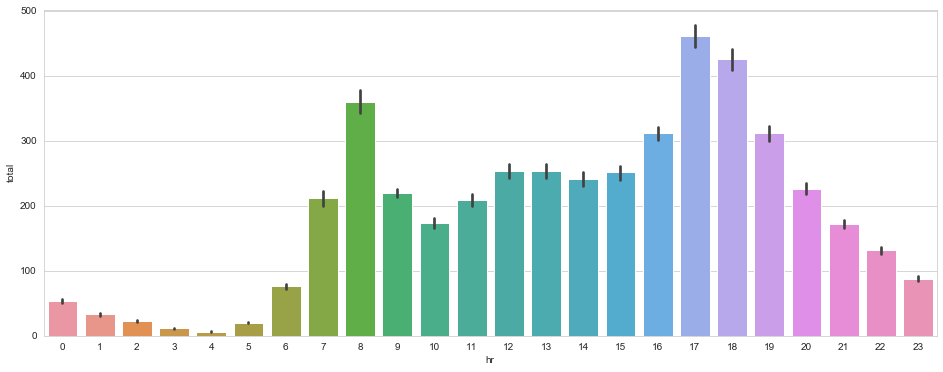

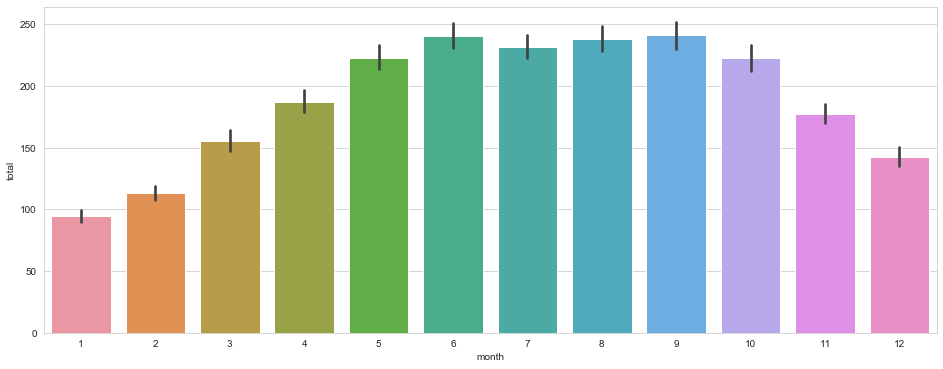

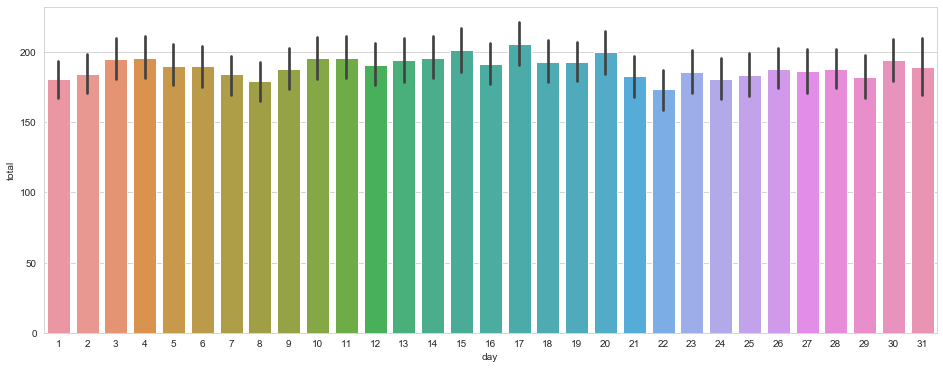

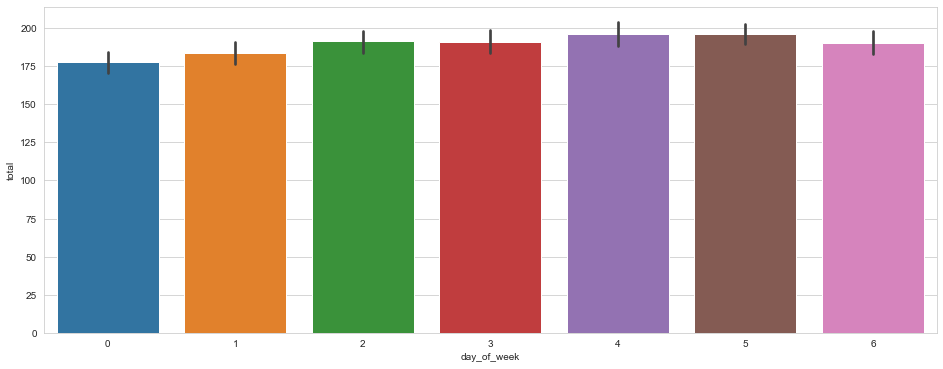

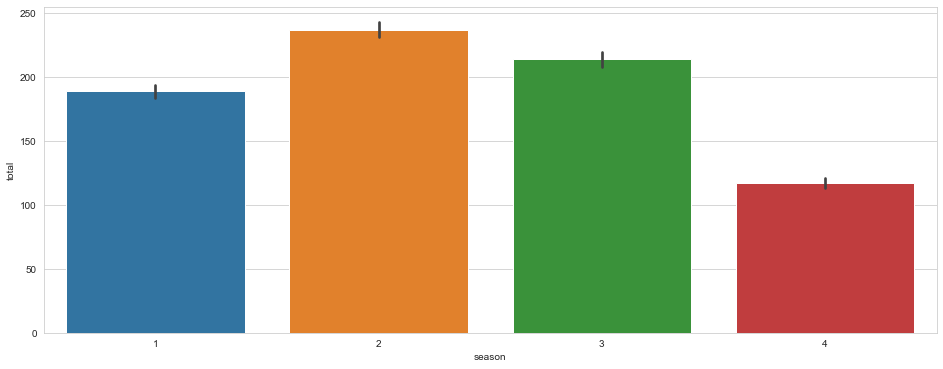

In [96]:
for i in ['hr', 'month', 'day', 'day_of_week', 'season']:
    plt.figure(figsize=(16,6))
    # plt.bar(df['hr'], df['temp'], alpha=0.8)
    sns.barplot(x=i, y="total", data=df, estimator=np.mean)

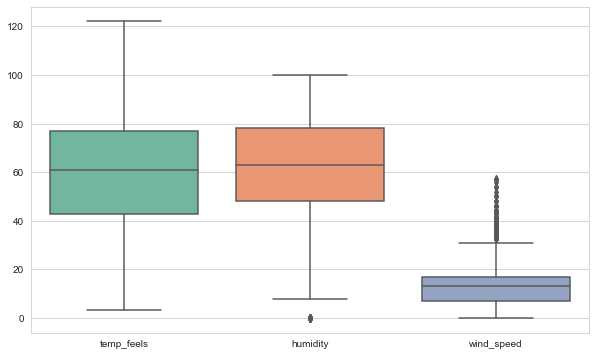

In [97]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df[['temp_feels','humidity','wind_speed']], palette="Set2")

In [98]:
df.head()

,date,season,hr,holiday,day_of_week,working_day,weather_type,temp_feels,humidity,wind_speed,total,day,month,year
0,2011-01-01,4,0,0,6,0,1,37.4,81,0,16,1,1,0
1,2011-01-01,4,1,0,6,0,1,35.6,80,0,40,1,1,0
2,2011-01-01,4,2,0,6,0,1,35.6,80,0,32,1,1,0
3,2011-01-01,4,3,0,6,0,1,37.4,75,0,13,1,1,0
4,2011-01-01,4,4,0,6,0,1,37.4,75,0,1,1,1,0


## Preprocessing

In [99]:
# min-max scaling

features=['temp_feels', 'humidity', 'wind_speed']

for i in features:
    scaler = MinMaxScaler()
    df[i] = scaler.fit_transform(df[[i]])

In [100]:
# cyclic encoding

def cyc_enc(df, col, max_vals):
    df[col+'_sin'] = np.sin(2 * np.pi * df[col]/max_vals)
    df[col+'_cos'] = np.cos(2 * np.pi * df[col]/max_vals)
    return df

df = cyc_enc(df, 'season', 4)
df = cyc_enc(df, 'hr', 24)
df = cyc_enc(df, 'day_of_week', 7)
df = cyc_enc(df, 'month', 12)
df = cyc_enc(df, 'day', 31)

In [101]:
# one hot encoding using pandas get_dummies

features=['weather_type']

for i in features:
    temp=pd.get_dummies(df[i], prefix='wt', prefix_sep='_')
    df=pd.concat([df,temp], axis=1)
    df=df.drop(i, axis=1)

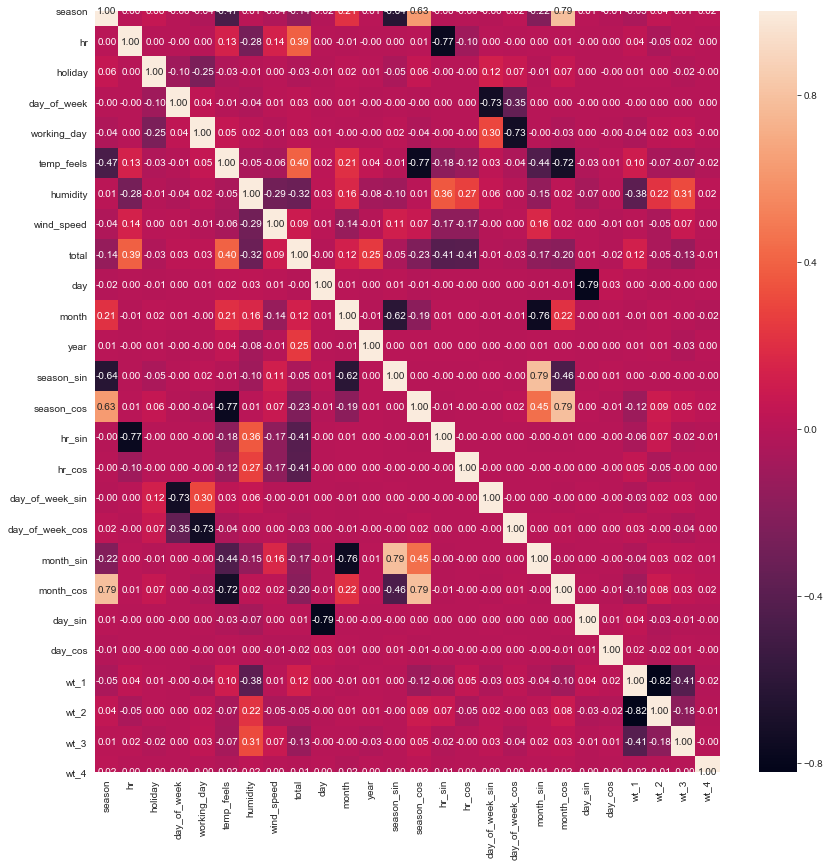

In [113]:
# final correlation matrix

plt.figure(figsize=(14, 14))
sns.heatmap(df.corr(), annot=True, fmt='.2f')

## Train Test Split

In [104]:
X=df.drop(['date','total'], axis=1)
y=df['total']
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.3)

## Regression Models

15591.845366269265
91.37033825951954
13377    212
713        4
15038    413
7460     315
739        2
9538     289
7628     233
1137      18
10413     60
9141      85
Name: total, dtype: int64
[ 457.1831991  -173.70354349  350.32348612  237.87341509  -64.36721653
  191.20880777  244.60819708 -101.53215195  122.03542524  172.70244319]


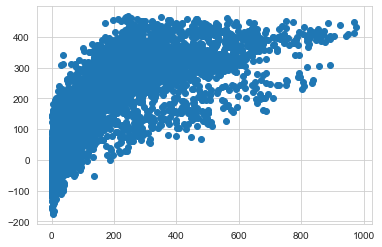

In [105]:
# linear regression

lr=LinearRegression()
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)

print(mean_squared_error(y_pred, y_test))
print(mean_absolute_error(y_pred, y_test))
print(y_test[:10])
print(y_pred[:10])

plt.scatter(y_test, y_pred)

19
5505.868132804842
47.70323488045007

13377    212
713        4
15038    413
7460     315
739        2
9538     289
7628     233
1137      18
10413     60
9141      85
Name: total, dtype: int64
[232.33333333   3.66666667 358.66666667 351.          35.66666667
 254.33333333 374.33333333   8.33333333  39.66666667 123.        ]


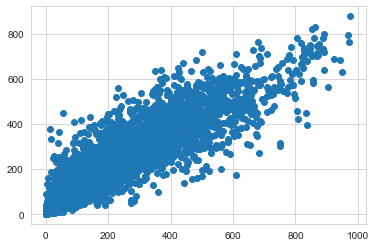

In [116]:
# k nearest neighbours regressor

knn=KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred=knn.predict(X_test)

print(i)
print(mean_squared_error(y_pred, y_test))
print(mean_absolute_error(y_pred, y_test))
print('')

print(y_test[:10])
print(y_pred[:10])
plt.scatter(y_test, y_pred)

In [118]:
rf.feature_importances_

array([9.22993673e-04, 3.76932971e-01, 9.06291667e-04, 5.26459084e-03,
       6.67926789e-02, 1.35345091e-01, 2.41890303e-02, 6.68918502e-03,
       6.59164076e-03, 1.54276693e-02, 8.41647581e-02, 1.16851535e-03,
       3.13281146e-03, 1.46934711e-01, 7.30116156e-02, 4.82084952e-03,
       3.13022519e-03, 7.50336490e-03, 2.79631345e-03, 1.03988242e-02,
       5.72509600e-03, 1.32140731e-03, 6.64524845e-04, 1.61644939e-02,
       3.47133231e-07])

3566.285001917913
34.853471423091676
13377    212
713        4
15038    413
7460     315
739        2
9538     289
7628     233
1137      18
10413     60
9141      85
Name: total, dtype: int64
[244.   2. 266. 243.   3. 242. 320.   8.  76. 110.]


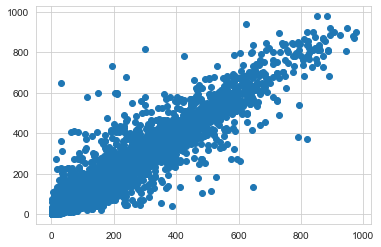

In [107]:
# decision tree regressor

dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)

print(mean_squared_error(y_pred, y_test))
print(mean_absolute_error(y_pred, y_test))
print(y_test[:10])
print(y_pred[:10])

plt.scatter(y_test, y_pred)

C:\Users\imdevskp\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning:

The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.



1913.341494054469
26.885404679708476
13377    212
713        4
15038    413
7460     315
739        2
9538     289
7628     233
1137      18
10413     60
9141      85
Name: total, dtype: int64
[215.5   3.9 330.6 213.3   3.7 282.7 250.1  10.8  54.9 109.3]


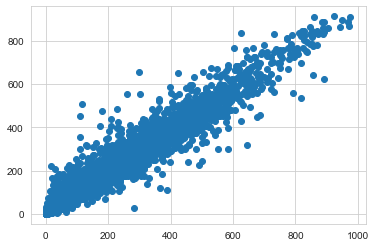

In [108]:
# random forest regressor

rf=RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)

print(mean_squared_error(y_pred, y_test))
print(mean_absolute_error(y_pred, y_test))
print(y_test[:10])
print(y_pred[:10])

plt.scatter(y_test, y_pred)